# Otimização de Carteira de Investimento

### Ciro Cavani

#### BigData - Globo.com

### Aplicações, Modelos e Métodos - INF2982

#### Prof. Thibaut Vidal

#### 2015-2

Código:

https://github.com/cirocavani/puc-inf2982

02/12/2015

## Agenda

1. Visão Geral
2. Modelo Básico: Quadratic Programming
3. Modelo Estendido: Mixed Integer Quadratic Programming
4. Meta Heurística: Simulated Annealing
5. Implementação com JuMP
6. Resultados com dados da BMFBovespa

## Visão Geral

O paper apresenta um algoritmo para a solução de Seleção de Ativos para Carteira de Investimentos baseado na meta-heurística Simulated Annealing.

Meta-heurística Simulated Annealing:

* deslocamento e tratamento de restrições
* resfriamento e critério de parada

## Modelo Básico: Quadratic Programming

$$
\begin{align}
\text{minimize} \qquad & \sum_{i=1}^{n}\sum_{j=1}^{n} C_{ij} x_{i} x_{j} \\
 \text{subject to} \quad \quad & \sum_{i=1}^{n} R_{i} x_{i} = R_{exp} \\
 \qquad \qquad & \sum_{i=1}^{n} x_{i} = 1 \\
 \qquad \qquad & x_{i} \ge 0 & i = 1, \ldots, n \\
\end{align}
$$

$n$ = número de ativos

Variável de Decisão:

$x \in \mathbb{R}_{+}^n$: proporção de investimento em cada ativo

Parâmetros:

$C \in \mathbb{R}^{n \times n}$: matriz de covariança do retorno dos ativos<br/>
$R \in \mathbb{R}^n$: retorno médio de cada ativo<br/>
$R_{exp} \in \mathbb{R}$: retorno esperado para carteira<br/>

## Modelo Estentido: Mixed Integer Quadratic Programming
<small>
$$
\begin{align}
\text{minimize} \qquad & \sum_{i=1}^{n}\sum_{j=1}^{n} C_{ij} x_{i} x_{j} \\
 \text{subject to} \quad \quad & \sum_{i=1}^{n} R_{i} x_{i} = R_{exp} \\
 \qquad \qquad & \sum_{i=1}^{n} x_{i} = 1 \\
 \qquad \qquad & \underline{x}_{i} \le x_{i} \le \overline{x}_{i} & i = 1, \ldots, n \\
 \qquad \qquad & max(x_{i} - x^{(0)}_{i}, 0) \le \overline{B}_{i} & i = 1, \ldots, n \\
 \qquad \qquad & max(x^{(0)}_{i} - x_{i}, 0) \le \overline{S}_{i} & i = 1, \ldots, n \\
 \qquad \qquad & x_{i} = x^{(0)}_{i} \text{ or } x_{i} \ge (x^{(0)}_{i} + \underline{B}_{i}) \text{ or } x_{i} \le (x^{(0)}_{i} - \underline{S}_{i})  & i = 1, \ldots, n \\
 \qquad \qquad & |\lbrace i \in \lbrace 1, \ldots, n \rbrace : x_{i} \ne 0 \rbrace| \le N \\
\end{align}
$$
</small>

Parâmetros adicionais:

$x^{(0)} \in \mathbb{R}_{+}^n$: investimento proporcional inicial<br/>
$\underline{x}, \overline{x} \in \mathbb{R}_{+}^n$: mínimo e máximo investimento por ativo<br/>
$\underline{B}, \overline{B} \in \mathbb{R}_{+}^n$: mínima e máxima quantidade de compra por ativo<br/>
$\underline{S}, \overline{S} \in \mathbb{R}_{+}^n$: mínima e máxima quantidade de venda por ativo<br/>
$N \in \mathbb{N}^{*}$: limite do número de ativos na Carteira

# Meta Heurística: Simulated Annealing
$$\text{min} \quad F(x) \quad \text{s.t.} \quad x \in X$$
<small>
* Escolher uma solução inicial $x^{(0)}$
* Inicializar a melhor solução $(x^{*}, F^{*}) \gets (x^{(0)}, F(x^{(0)}))$
* Para $n$ começando de 0 até a condição de parada, fazer:
 * Obter uma solução aleatória $x$ na vizinhança $V(x^{(n)})$
 * Se $F(x) \le F(x^{(n)})$ então $x^{(n+1)} \gets x$ e se $F(x) \le F^{*}$ então $(x^{*}, F^{*}) \gets (x, F(x))$
 * Se $F(x) \gt F(x^{(n)})$ então obter um número aleatório $p \in [0, 1]$ e se $p \le p(n, x, x^{(n)})$ então $x^{(n+1)} \gets x$ senão $x^{(n+1)} \gets x^{(n)}$ 
</small>

$$
p(n, x, x^{(n)}) = exp(-\frac{1}{T_{n}} \Delta{F_{n}}) \\
\Delta{F_{n}} = F(x) - F(x^{(n)}) \\
T_{n} = \text{temperatura no passo } n
$$

* *Geometric cooling schedules*: temperatura fica inalterada durante $L$ passos consecutivos, então é multiplicada por $\alpha \in (0, 1)$.

## Modelagem: JuMP

http://www.juliaopt.org/

*An algebraic modeling language for linear, quadratic, and nonlinear constrained optimization problems embedded in Julia. Generates models as quick as commercial modeling tools and supports advanced features like solver callbacks.*

### Solver: Ipopt

https://projects.coin-or.org/Ipopt

Ipopt (**I**nterior **P**oint **OPT**imizer, pronounced eye-pea-Opt) is a software package for large-scale nonlinear optimization.

In [1]:
using JuMP, Ipopt

n = 5  # número de ativos
t = 10 # número de observações
data = randn(t, n) # dados sintéticos

10x5 Array{Float64,2}:
  0.905268   -1.07773   -2.4716    -0.0400405  -1.03561  
 -0.599196    1.8493    -0.339334  -0.679873    0.83404  
 -0.990121    1.31463    0.166599  -1.09878     0.0772767
 -0.0207885  -1.37912   -0.484552  -0.283653    0.712995 
 -1.51402     0.353582   0.165755   0.93574     0.483101 
  0.687132   -0.514446   0.104946   0.478305   -0.45667  
  0.548322    1.99339    0.808442  -2.57898     0.746965 
 -0.425774   -0.136581   0.936519  -0.154998    0.156909 
  0.656519   -1.19304   -1.4799     1.10717     0.828934 
 -1.53172    -1.43295   -0.676919   0.0583084   0.138908 

In [2]:
# covariança e retorno médio
C, R = cov(data), mean(data, 1)

(
5x5 Array{Float64,2}:
  0.851221   -0.192629  -0.333894  -0.0943557  -0.147946
 -0.192629    1.78503    0.78604   -0.973019    0.279727
 -0.333894    0.78604    1.07052   -0.461857    0.246602
 -0.0943557  -0.973019  -0.461857   1.13901    -0.115859
 -0.147946    0.279727   0.246602  -0.115859    0.377217,

1x5 Array{Float64,2}:
 -0.228437  -0.0222962  -0.327004  -0.225681  0.248684)

In [3]:
# Retorno esperado
R_exp = 0.1

0.1

In [6]:
model = Model(solver = IpoptSolver(print_level=0))
@defVar(model, x[1:n] ≥ 0)
@setObjective(model, Min, sum{C[i,j] * x[i] * x[j], i=1:n, j=1:n})
@addConstraint(model, sum{R[i] * x[i], i=1:n} ≥ R_exp)
@addConstraint(model, sum(x) == 1)

println("The optimization problem to be solved is:\n\n", model)

The optimization problem to be solved is:

Min 0.851221460113357 x[1]² - 0.3852579685754296 x[1]*x[2] + 1.7850325852610336 x[2]² - 0.6677886598849821 x[1]*x[3] + 1.572080713224081 x[2]*x[3] + 1.0705150975974584 x[3]² - 0.1887114725231952 x[1]*x[4] - 1.9460374441779436 x[2]*x[4] - 0.9237148100941497 x[3]*x[4] + 1.1390110028823335 x[4]² - 0.2958917931271824 x[1]*x[5] + 0.5594547478540457 x[2]*x[5] + 0.49320437578366016 x[3]*x[5] - 0.23171701999778893 x[4]*x[5] + 0.37721713686343317 x[5]²
Subject to
 -0.2284370656904795 x[1] - 0.02229623938219576 x[2] - 0.3270041334802433 x[3] - 0.22568062159495292 x[4] + 0.24868438840614077 x[5] ≥ 0.1
 x[1] + x[2] + x[3] + x[4] + x[5] = 1
 x[i] ≥ 0 ∀ i ∈ {1,2,…,4,5}



In [7]:
status = solve(model)

println("Status of the problem is ", status, "\n")

if status == :Optimal
    println("Objective value:\n\n", getObjectiveValue(model), "\n")
    println("Optimal solution:\n\n", "x = ", getValue(x))
end

Status of the problem is Optimal

Objective value:

0.15993587423453293

Optimal solution:

x = [0.1570929334450458,0.0427021457916717,0.0,0.1310394724577683,0.6691654576605859]


## Resultados com dados da BMFBovespa

Dados: histórico do preço dos títulos negociados na BMFBovespa no mês de Novembro/2015.

* 5995 movimentações, 19 dias, 451 ações, 369 empresas
* ~17 milhões de negociações, 8,3 bilhões de títulos, 110 bilhões de reais

In [8]:
using DataFrames
df = readtable("maxreturn.tsv")
head(df)

,CODNEG,DATE,RET
1,BRIN3,2015-11-03,0.036144578313253045
2,BRIN3,2015-11-04,-0.011363636363636374
3,BRIN3,2015-11-05,0.0
4,BRIN3,2015-11-06,-0.011363636363636374
5,BRIN3,2015-11-09,0.05882352941176476
6,BRIN3,2015-11-10,-0.01111111111111112


In [9]:
assets, R, C = readdlm("maxreturn-n.tsv"), readdlm("maxreturn-R.tsv"), readdlm("maxreturn-C.tsv")
println("Returns: mean, variance\n")
for i=1:length(assets)
    a, m, v = assets[i], round(R[i], 4), round(C[i,i], 4)
    println(a, " = (", m, ", ", v, ")")
end

Returns: mean, variance

BRIN3 = (0.0131, 0.001)
BRKM5 = (0.0088, 0.0006)
CSMG3 = (0.0109, 0.001)
ELET3 = (0.0117, 0.0016)
LOGN3 = (0.0237, 0.0167)
MAGG3 = (0.0109, 0.0006)
PNVL3 = (0.0125, 0.0006)
POSI3 = (0.0084, 0.0009)
ROMI3 = (0.0111, 0.0012)
VIVR3 = (0.0833, 0.0594)


In [10]:
using Gadfly, Interact
set_default_plot_size(20cm, 12cm)

n = length(assets)

p(df) = layer(df, x = :DATE, y = :RET, color = :CODNEG, Geom.line, Geom.point)
rplot(g) = plot(g,
    Guide.title("Retorno por dia"),
    Guide.xlabel("Data"),
    Guide.ylabel("Retorno"),
    Guide.colorkey("Ações"))

function plotQuotes()
    g = Array(Layer, 0)
    for q in unique(df[:CODNEG])
        push!(g, p(df[df[:CODNEG] .== q, :])...)
    end
    rplot(g)
end

function exploreQuotes()
    @manipulate for q=unique(df[:CODNEG])
        rplot(p(df[df[:CODNEG] .== q, :]))
    end
end

function opt(R_exp)
    model = Model(solver = IpoptSolver(print_level=0))
    @defVar(model, x[1:n] ≥ 0)
    @setObjective(model, Min, sum{C[i,j] * x[i] * x[j], i=1:n, j=1:n})
    @addConstraint(model, sum{R[i] * x[i], i=1:n} ≥ R_exp)
    @addConstraint(model, sum(x) == 1)
    status = solve(model)
    xopt = status == :Optimal ? round(getValue(x), 2) : nothing
    status, xopt
end

function exploreX()
    @manipulate for R_exp=0.0:0.005:maximum(R)
        status, xopt = opt(R_exp)
        out = string("Status of the problem is ", status, " for ", R_exp, "<br/><br/>")
        if status == :Optimal
            out = string(out, "Return: ", vec(R) ⋅ xopt, "<br/><br/>")
            for i=1:n
                out = string(out, assets[i], " = ", xopt[i], "<br/>")
            end
        end
        html(out)
    end
end

function optret(xopt)
    r = nothing
    for i=1:n
        xopt[i] == 0.0 && continue
        q = assets[i]
        s = df[df[:CODNEG] .== q, :][:RET] * xopt[i]
        if r === nothing
            r = s
        else
            r += s
        end
    end
    DataFrame(DATE = unique(df[:DATE]), CODNEG = fill("OPT", length(r)), RET = r)
end

function exploreR()
    empty = DataFrame(DATE = AbstractString[], CODNEG = AbstractString[], RET = Float64[])
    @manipulate for R_exp=0.0:0.005:maximum(R)
        status, xopt = opt(R_exp)
        optdf = status == :Optimal ? optret(xopt) : empty
        rplot(p(optdf))
    end
end

  likely near /home/cavani/.julia/v0.4/Interact/src/IJulia/setup.jl:153
  likely near /home/cavani/.julia/v0.4/Interact/src/IJulia/setup.jl:157


exploreR (generic function with 1 method)

 in depwarn at deprecated.jl:73
 in call at deprecated.jl:50
 in include_string at loading.jl:266
 in execute_request_0x535c5df2 at /home/cavani/.julia/v0.4/IJulia/src/execute_request.jl:177
 in eventloop at /home/cavani/.julia/v0.4/IJulia/src/IJulia.jl:141
 in anonymous at task.jl:447
while loading /home/cavani/.julia/v0.4/Interact/src/IJulia/statedict.jl, in expression starting on line 1


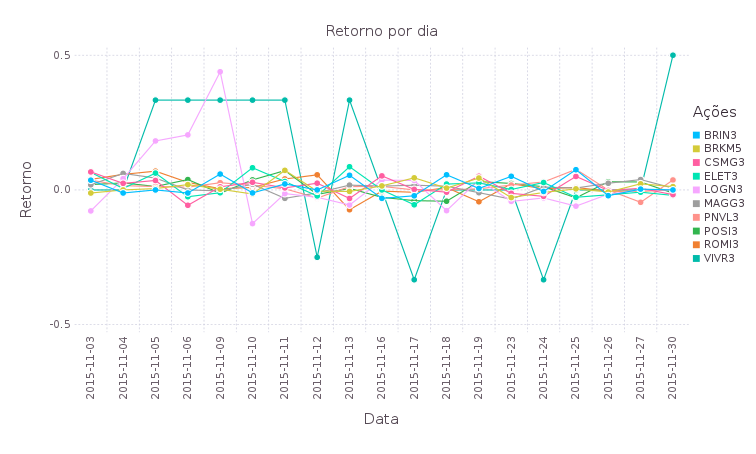

In [11]:
plotQuotes()

Interact.Options{:ToggleButtons,UTF8String}([Reactive.Input{UTF8String}] BRIN3,"q","BRIN3","BRIN3",Interact.OptionDict(Any["BRIN3","BRKM5","CSMG3","ELET3","LOGN3","MAGG3","PNVL3","POSI3","ROMI3","VIVR3"],Dict{Any,Any}("PNVL3"=>"PNVL3","VIVR3"=>"VIVR3","BRIN3"=>"BRIN3","ELET3"=>"ELET3","POSI3"=>"POSI3","BRKM5"=>"BRKM5","CSMG3"=>"CSMG3","ROMI3"=>"ROMI3","MAGG3"=>"MAGG3","LOGN3"=>"LOGN3")),Any[],Any[])

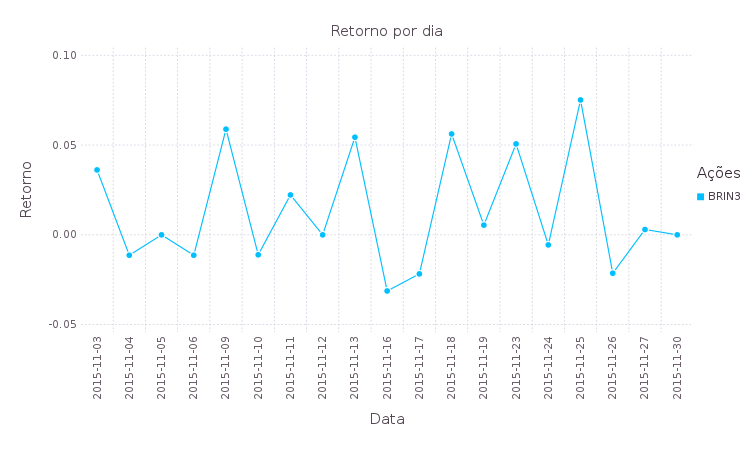

In [12]:
exploreQuotes()

In [13]:
exploreX()

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.04,"R_exp",0.04,0.0:0.005:0.08)

Interact.HTML("","Status of the problem is Optimal for 0.04<br/><br/>Return: 0.04024732339811024<br/><br/>BRIN3 = 0.05<br/>BRKM5 = 0.0<br/>CSMG3 = 0.53<br/>ELET3 = 0.0<br/>LOGN3 = 0.02<br/>MAGG3 = 0.0<br/>PNVL3 = 0.0<br/>POSI3 = 0.0<br/>ROMI3 = 0.0<br/>VIVR3 = 0.4<br/>")

Interact.Slider{Float64}([Reactive.Input{Float64}] 0.04,"R_exp",0.04,0.0:0.005:0.08)

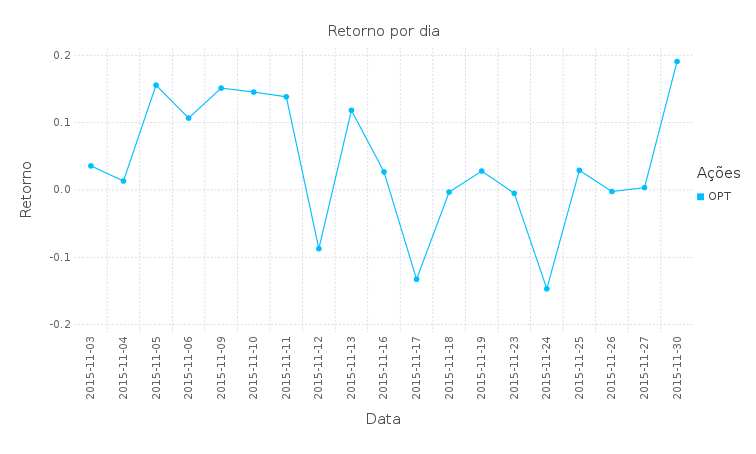

In [14]:
exploreR()